In [1]:
# %pip install ipdb
# %pip install scikit-image
# %pip install visdom
# %pip install torchnet
# %pip install ipywidgets

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'


%load_ext autoreload
%autoreload 2
import os
import torch
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at

%matplotlib inline

In [1]:
import torchvision

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

c:\Users\SVhd08\anaconda3\envs\py39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\SVhd08\anaconda3\envs\py39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
# model  = torch.load("sehyun_pretrained/1batch_20220707_fasterrcnn_11_epoch_model.pth")

In [4]:
# import torchvision
# from torchvision.models.detection import FasterRCNN
# from torchvision.models.detection.rpn import AnchorGenerator


# # load a pre-trained model for classification and return only the features
# backbone = torchvision.models.vgg16_bn(pretrained=True).features
# # FasterRCNN needs to know the number of
# # output channels in a backbone. For mobilenet_v2, it's 1280
# # so we need to add it here
# backbone.out_channels = 512

# # let's make the RPN generate 5 x 3 anchors per spatial
# # location, with 5 different sizes and 3 different aspect
# # ratios. We have a Tuple[Tuple[int]] because each feature
# # map could potentially have different sizes and
# # aspect ratios
# anchor_generator = AnchorGenerator(sizes=((128, 256, 512),),
#                                    aspect_ratios=((0.5, 1.0, 2.0),))

# # let's define what are the feature maps that we will
# # use to perform the region of interest cropping, as well as
# # the size of the crop after rescaling.
# # if your backbone returns a Tensor, featmap_names is expected to
# # be [0]. More generally, the backbone should return an
# # OrderedDict[Tensor], and in featmap_names you can choose which
# # feature maps to use.
# roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'],
#                                                 output_size=7,
#                                                 sampling_ratio=2)

# # put the pieces together inside a FasterRCNN model
# model = FasterRCNN(backbone,
#                    num_classes=10,
#                    rpn_anchor_generator=anchor_generator,
#                    box_roi_pool=roi_pooler)

---

In [3]:
img = read_image('misc/demo6.jpg')
img = torch.from_numpy(img)[None]

In [6]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()
trainer

Setting up a new session...
Traceback (most recent call last):
  File "c:\Users\SVhd08\anaconda3\envs\py39\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "c:\Users\SVhd08\anaconda3\envs\py39\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "c:\Users\SVhd08\anaconda3\envs\py39\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\SVhd08\anaconda3\envs\py39\lib\site-packages\urllib3\connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "c:\Users\SVhd08\anaconda3\envs\py39\lib\site-packages\urllib3\connectionpool.py", line 398, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "c:

Exception in user code:
------------------------------------------------------------


FasterRCNNTrainer(
  (faster_rcnn): FasterRCNNVGG16(
    (extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): Re

In [7]:
# trainer.state_dict()

In [8]:
# trainer = trainer.load('sehyun_pretrained/1batch_20220707_fasterrcnn_11_epoch_model.pth')
# trainer.state_dict()

In [9]:
# state_dict = torch.load('sehyun_quantized/quantized_model_FasterRCNN_statedict.pth')
# state_dict

# 1. model trained with torchvision pretrained model

In [10]:
# pretrained model
# a = torch.load('sehyun_pretrained/1batch_20220707_fasterrcnn_11_epoch_model.pth')
# a


# quantized model
# state_dict = torch.load('sehyun_quantized/quantized_model_FasterRCNN_statedict_721.pth')
# state_dict


# quantized model[2]
# model.eval()
# prediction = model(img)
# prediction[0]

# faster_rcnn.load_state_dict(state_dict, strict=False)

In [5]:
model.eval()
model(img)

[{'boxes': tensor([[  0.0000,   0.0000, 640.0000, 480.0000],
          [  0.0000,   0.0000, 640.0000, 480.0000],
          [  0.0000,   0.0000, 640.0000, 134.3137],
          [575.4301,   0.0000, 640.0000, 480.0000]], grad_fn=<StackBackward0>),
  'labels': tensor([ 1, 67,  1,  1]),
  'scores': tensor([1., 1., 1., 1.], grad_fn=<IndexBackward0>)}]

<AxesSubplot:>

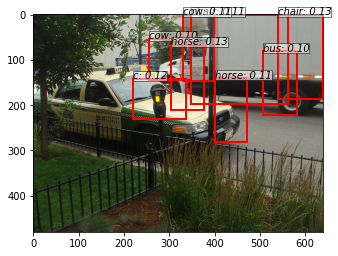

In [17]:
# Models have to be selected

# Method [1] :: Not Quantized
# trainer.load = 해당 Model의 Weight부분의 값만 가져오는 Module
# trainer = trainer.load('sehyun_pretrained/1batch_20220707_fasterrcnn_11_epoch_model.pth')
# _bboxes, _labels, _scores = trainer.faster_rcnn.predict(img, visualize=True)



# # Method [2] :: Quantized
state_dict = torch.load('sehyun_quantized/quantized_model_FasterRCNN_statedict.pth')

state_dict_NEW = {key.replace("faster_rcnn.", "") :value for key, value in state_dict.items()}
trainer.load_state_dict(state_dict_NEW, strict=False)
# _bboxes, _labels, _scores = trainer.faster_rcnn.predict(img, visualize=True)



vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

In [ ]:
_bboxes

[array([[8.0558212e+01, 5.0598004e+02, 2.2221101e+02, 5.8212335e+02],
        [1.4160991e+02, 2.1968504e+02, 2.2978639e+02, 3.3708942e+02],
        [0.0000000e+00, 5.3937933e+02, 1.8622479e+02, 6.3982281e+02],
        [0.0000000e+00, 3.4810239e+02, 1.9783063e+02, 5.6217200e+02],
        [6.1626434e-01, 3.2974811e+02, 1.4655023e+02, 3.9964862e+02],
        [5.2863350e+01, 2.5469505e+02, 1.4446939e+02, 3.4822830e+02],
        [6.6139557e+01, 3.0493109e+02, 2.0974469e+02, 3.7586005e+02],
        [1.4039294e+02, 4.0209006e+02, 2.8058676e+02, 4.7195456e+02]],
       dtype=float32)]

In [ ]:
_labels

[array([ 5,  6,  8,  8,  9,  9, 12, 12])]

In [ ]:
_scores

[array([0.10131318, 0.1189132 , 0.12936068, 0.10974424, 0.11025363,
        0.10241492, 0.13032286, 0.10559533], dtype=float32)]

---

In [ ]:
NO_quantized_file_size = os.path.getsize(r'sehyun_pretrained/1batch_20220707_fasterrcnn_11_epoch_model.pth')
print('File Size:', NO_quantized_file_size/(1024*1024), 'MB')


YES_quantized_file_size = os.path.getsize(r'sehyun_quantized/quantized_model_FasterRCNN_statedict_721.pth')
print('File Size:', YES_quantized_file_size/(1024*1024), 'MB')

File Size: 522.928692817688 MB
File Size: 131.0009889602661 MB
